#Installing Dependencies

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install pickle
!pip install scipy
!pip install sklearn

# EDA

In [ ]:
import math
import csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBRegressor
from scipy import stats,special
from sklearn.svm import SVR
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# There are 81 columns: 79 Features + Id + SalePrice
dataset = pd.read_csv("train.csv")
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Separating numerical and categorical data
numerical_features = dataset.dtypes[dataset.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = dataset.dtypes[dataset.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
print(dataset[numerical_features].columns)
print("*"*100)
print(dataset[categorical_features].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [ ]:
# List of features with missing values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [ ]:
# There are 19 features having missing values 
# 16 Categorical
# 3 Numerical
categorical_null = []
numerical_null = []
for index,row in missing_data.iterrows():
    if row['Total'] != 0:
        if index in categorical_features:
            categorical_null.append(index)
        else:
            numerical_null.append(index)

In [ ]:
print(categorical_null)
print("*"*100)
print(numerical_null)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
****************************************************************************************************
['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


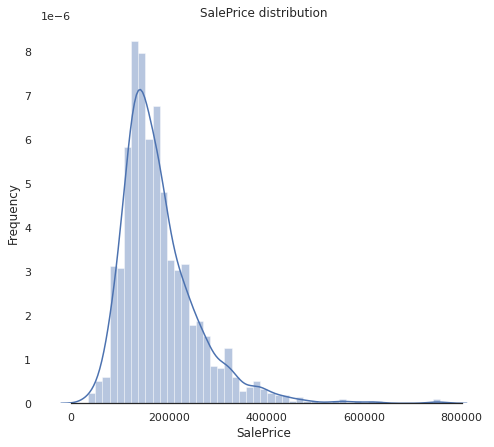

In [ ]:
# Sales price is not a normal distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(dataset['SalePrice']);
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

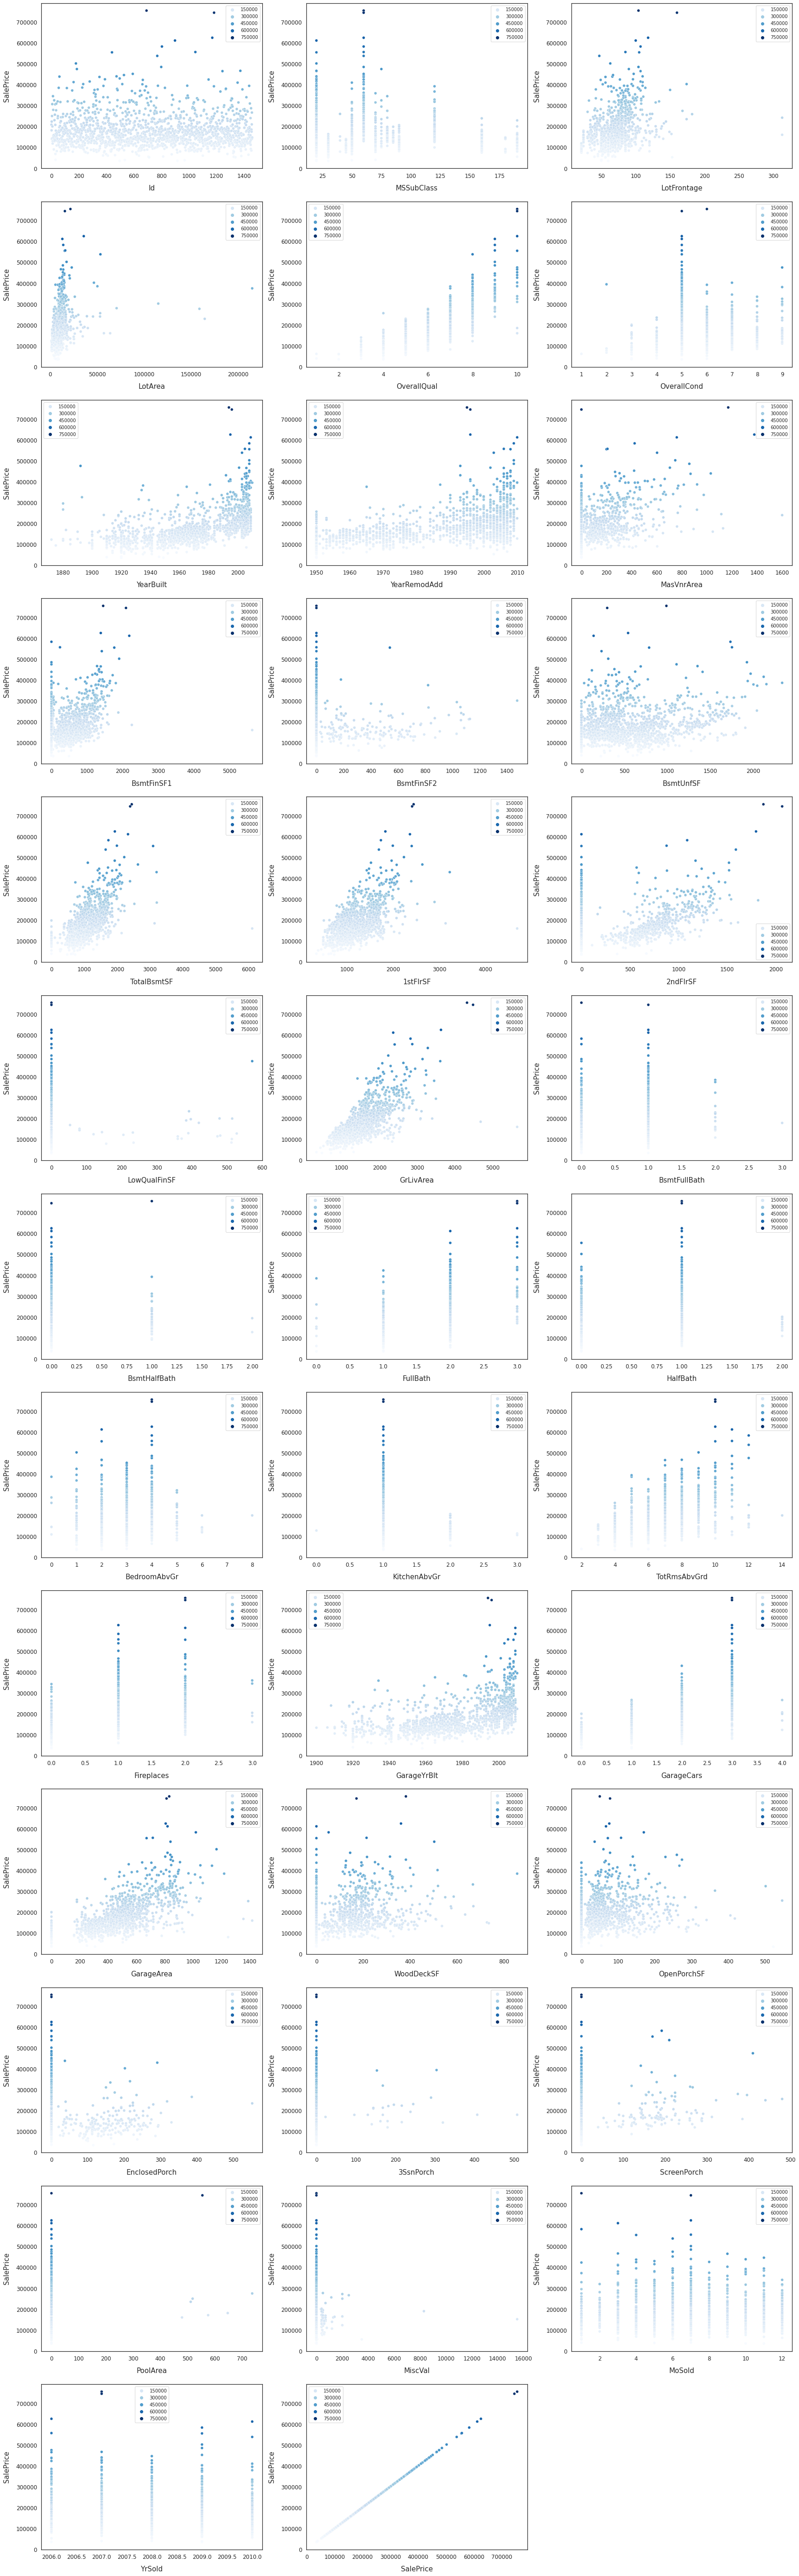

In [ ]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(dataset[numerical_features]), 1):
    plt.subplot(len(list(numerical_features)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=dataset)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [ ]:
# Categorical data and their unique value counts
for catg in list(categorical_features) :
    print(dataset[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

# Feature Engineering

In [ ]:
# Loading the both test and train set

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Removing ID since it is unique for each datapoint
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [ ]:
# Remove outliers
cols = [feature for feature in numerical_features if feature != 'Id' and feature != 'SalePrice']
Q1 = train[cols].quantile(0.01)
Q99 = train[cols].quantile(0.99)

median = train[cols].median()
for i in range(len(cols)):
  train.loc[((train[cols] < (Q1)) |(train[cols] > (Q99))).any(axis=1), cols[i]] = median[i]

train.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


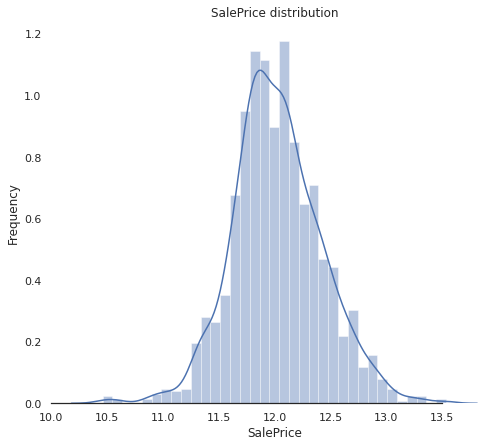

In [ ]:
# Normalising the dependent variable
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice']);
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 79)

### Dealing with Missing Values

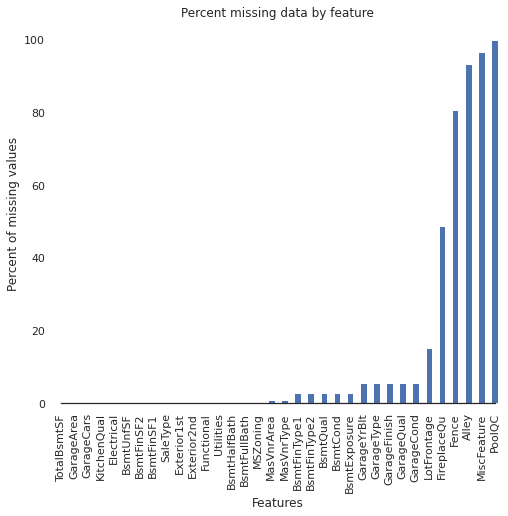

In [ ]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(all_features.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Check for missing attributes

In [ ]:
all_features['Functional'] = all_features['Functional'].fillna('Typ')
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA")

# Replace the missing values in each of the columns below with their mode
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# the data description stats that NA refers to "No Pool"
all_features["PoolQC"] = all_features["PoolQC"].fillna("NA")
# Replacing the missing values with 0, since no garage = no cars in garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)                              # Check for GarageYrBlt
# Replacing the missing values with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_features[col] = all_features[col].fillna('None')
# NaN values for these categorical basement features, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')
# Replacing Nan value for SaleType as Other
all_features['SaleType'] = all_features['SaleType'].fillna('Oth')
all_features['FireplaceQu'] = all_features['FireplaceQu'].fillna('NA')
all_features['Fence'] = all_features['Fence'].fillna('NA')
all_features['Alley'] = all_features['Alley'].fillna('NA')
all_features['MiscFeature'] = all_features['MiscFeature'].fillna('NA')

# Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# We have no particular intuition around how to fill in the rest of the categorical features
# So we replace their missing values with None
objects = []
for i in all_features.columns:
    if all_features[i].dtype == object:
        objects.append(i)
all_features.update(all_features[objects].fillna('None'))
    
# And we do the same thing for numerical features, but this time with 0s
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
all_features.update(all_features[numeric].fillna(0))   

In [ ]:
# Check if all the missing values have been dealt with or not
data = pd.DataFrame(all_features)
df_cols = list(pd.DataFrame(data))
dict_x = {}
for i in range(0, len(df_cols)):
    dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
df_miss = sorted(dict_x.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFul

In [ ]:
# Replacing year variables as differce of that and year sold
for year in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    all_features[year] = all_features['YrSold'] - all_features[year]
    all_features[year][all_features[year] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

In [ ]:
# Find skewed numerical features
skew_features = all_features[[feature for feature in numerical_features if feature != 'Id' and feature != 'SalePrice']].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(26)

There are 29 numerical features with Skew > 0.5 :


PoolArea         28.589413
MiscVal          27.742274
LowQualFinSF     19.238477
3SsnPorch        13.485713
KitchenAbvGr      4.468476
BsmtFinSF2        4.415997
EnclosedPorch     4.200364
BsmtHalfBath      4.015736
GarageYrBlt       3.966929
ScreenPorch       3.920978
LotArea           2.873496
MasVnrArea        2.527692
OpenPorchSF       2.378980
WoodDeckSF        1.768545
MSSubClass        1.487101
1stFlrSF          1.346528
BsmtFinSF1        1.021549
GrLivArea         0.969099
BsmtUnfSF         0.941331
2ndFlrSF          0.937225
OverallCond       0.757552
HalfBath          0.731109
TotRmsAbvGrd      0.699149
BsmtFullBath      0.652843
Fireplaces        0.637724
TotalBsmtSF       0.613408
dtype: float64

In [ ]:
# We need a normal distribution since sklean library assumes the data to have a normal distribution and
# does not perform well otherwise. Here we are trying to get a transformation which will give us a normal distribution.
# For this we are using box - cox transform of 1 + x
# y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
#     log(1+x)                    if lmbda == 0
# lmbda is calculated using boxcox_normmax

for i in skew_index:
    all_features[i] = special.boxcox1p(all_features[i], stats.boxcox_normmax(all_features[i] + 1))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
# Check skewness after normalisation 
num_features = all_features.dtypes[all_features.dtypes != "object"].index
for col in num_features:
    skew = all_features[col].skew()
    print('{:15}'.format(col), '{:05.2f}'.format(skew))

MSSubClass      00.40
LotFrontage     00.10
LotArea         00.01
OverallQual     00.22
OverallCond     00.49
YearBuilt       00.03
YearRemodAdd    -0.15
MasVnrArea      01.07
BsmtFinSF1      00.35
BsmtFinSF2      02.80
BsmtUnfSF       00.07
TotalBsmtSF     00.32
1stFlrSF        -0.01
2ndFlrSF        00.98
LowQualFinSF    10.62
GrLivArea       00.00
BsmtFullBath    00.67
BsmtHalfBath    03.93
FullBath        00.10
HalfBath        00.77
BedroomAbvGr    00.22
KitchenAbvGr    04.14
TotRmsAbvGrd    00.05
Fireplaces      00.50
GarageYrBlt     -0.15
GarageCars      -0.29
GarageArea      00.12
WoodDeckSF      00.81
OpenPorchSF     00.59
EnclosedPorch   02.21
3SsnPorch       11.02
ScreenPorch     03.27
PoolArea        22.12
MiscVal         05.66
MoSold          00.20
YrSold          00.13


In [ ]:
# One hot encoding categorical data because the models can only work with numerical data

# Label encode for random forest
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(2919, 303)

In [ ]:
# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]
all_features.shape

(2919, 303)

In [ ]:
# Split to test & train data
X_train = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]

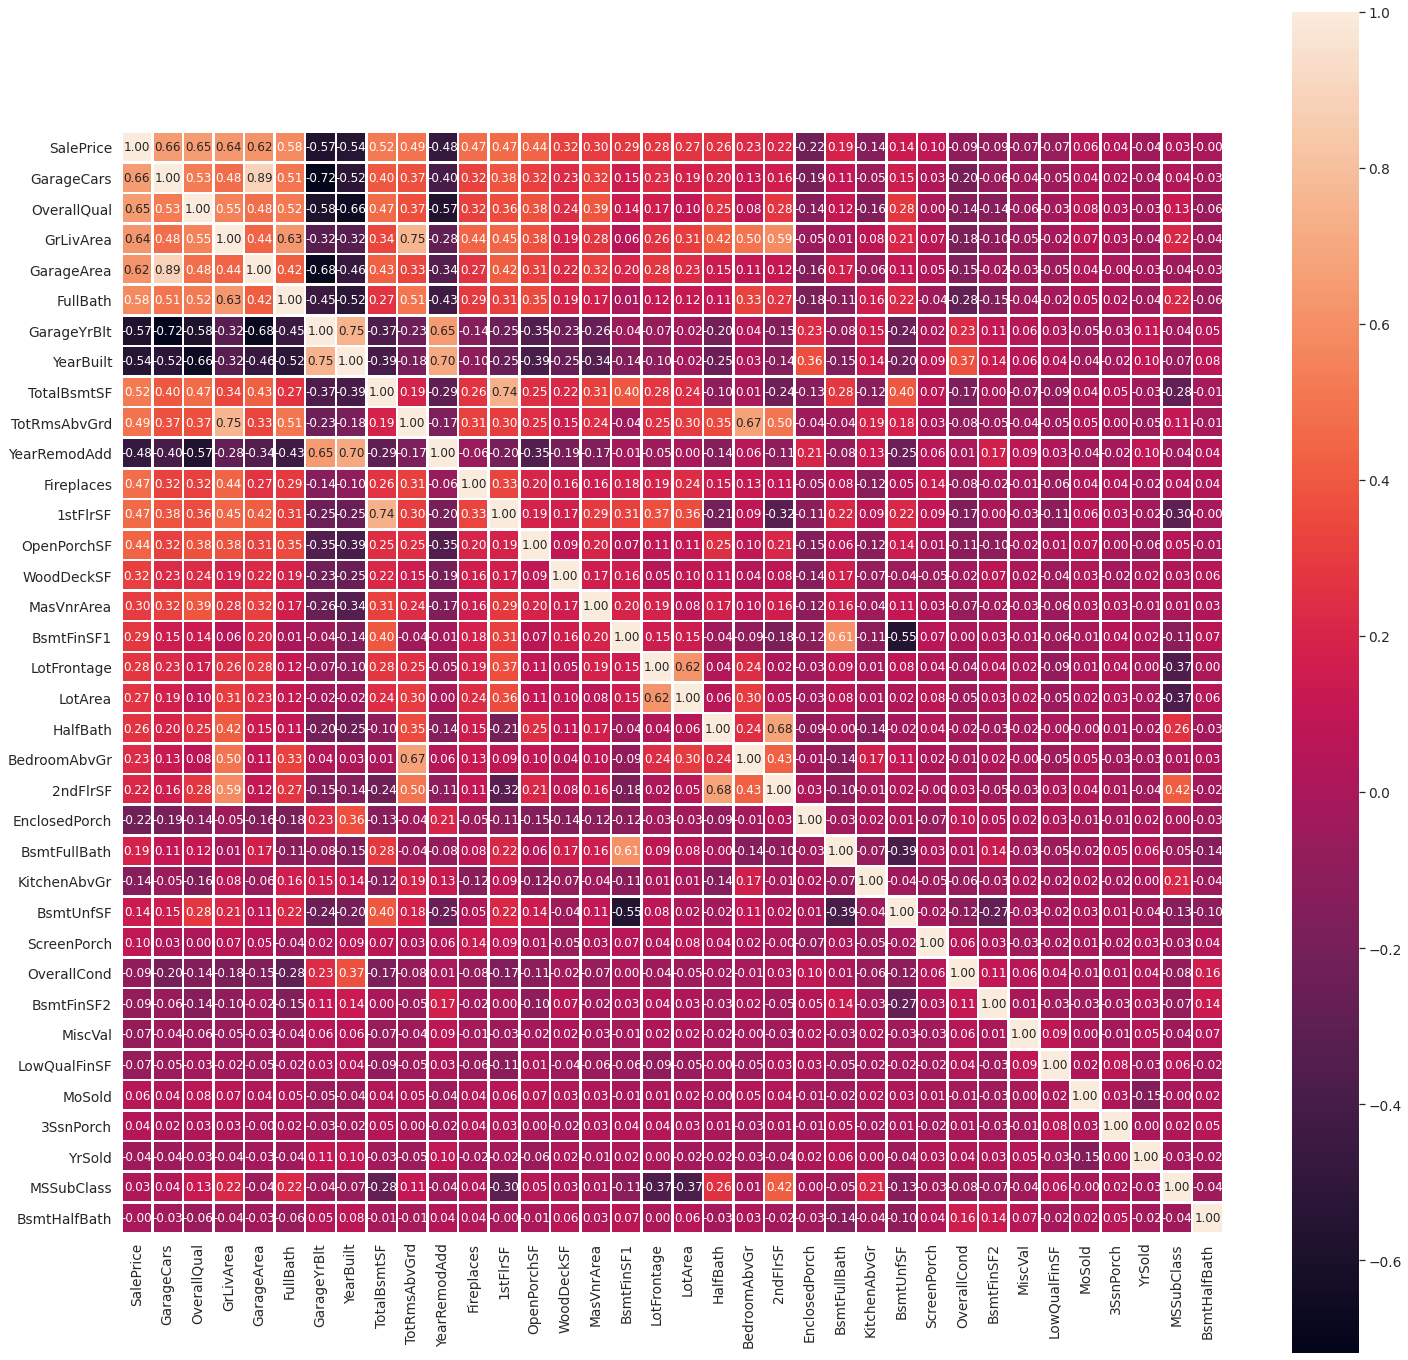

In [ ]:
# Heatmap
data = X_train.copy()[[feature for feature in num_features if feature != 'Id' and feature != 'SalePrice']].join(train_labels)
nr_feats=len(data.columns)

corr = data.corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(nr_feats, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(nr_feats/1.5, nr_feats/1.5))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=1.5, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Remove correrated features

In [ ]:
# Features with strong correlation to SalePrice
corr = X_train.copy().join(train_labels).corr()
corr_abs = corr.abs()

ser_corr = corr_abs.nlargest(len(X_train.columns), 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.3].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.3].index)

print(ser_corr.head(30))
print("*"*30)
print("List of numerical features with r above 0.3 :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below 0.3 :")
print(cols_bel_corr_limit)

SalePrice            1.000000
GarageCars           0.656305
OverallQual          0.653512
GrLivArea            0.635296
GarageArea           0.620649
ExterQual_TA         0.595882
FullBath             0.577230
GarageYrBlt          0.570773
YearBuilt            0.538744
KitchenQual_TA       0.538237
Foundation_PConc     0.530840
TotalBsmtSF          0.518985
FireplaceQu_NA       0.510026
ExterQual_Gd         0.509675
TotRmsAbvGrd         0.494605
BsmtQual_TA          0.477611
YearRemodAdd         0.476063
Fireplaces           0.471066
1stFlrSF             0.468123
HeatingQC_Ex         0.466706
BsmtQual_Ex          0.463991
BsmtFinType1_GLQ     0.440764
OpenPorchSF          0.440403
GarageFinish_Unf     0.432012
GarageFinish_Fin     0.418881
GarageType_Attchd    0.415787
KitchenQual_Ex       0.413937
KitchenQual_Gd       0.406601
GarageType_Detchd    0.388638
MasVnrType_None      0.387818
Name: SalePrice, dtype: float64
******************************
List of numerical features with r abo

In [ ]:
X_train.shape

(1460, 303)

 Variance vs Components Plot

In [ ]:
def plot(dim_red):
  plt.plot(np.cumsum(dim_red.explained_variance_ratio_))
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');
  plt.plot()

Getting feature set using different

In [ ]:
# Correlation 
features_used = np.array([f for f in all_features.columns if f not in cols_bel_corr_limit])
X_train_corr = X_train.copy()[features_used]
X_test_corr = X_test.copy()[features_used]
X_train_corr.to_csv('x_train_corr_median.csv', index=False)
X_test_corr.to_csv('x_test_corr_median.csv', index=False)

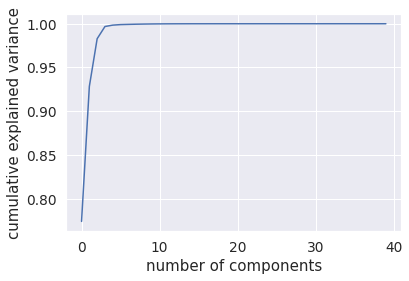

In [ ]:
# PCA
pca = PCA(n_components = 0.99998, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train.copy())
X_test_pca = pca.transform(X_test.copy())
pd.DataFrame(X_train_pca).to_csv('x_train_pca_median.csv', index=False)
pd.DataFrame(X_test_pca).to_csv('x_test_pca_median.csv', index=False)
plot(pca)

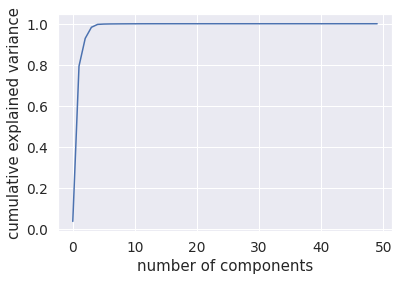

In [ ]:
# SVD
svd = TruncatedSVD(50)
X_train_svd = svd.fit_transform(X_train.copy())
X_test_svd = svd.transform(X_test.copy())
pd.DataFrame(X_train_corr).to_csv('x_train_svd_median.csv', index=False)
pd.DataFrame(X_test_corr).to_csv('x_test_svd_median.csv', index=False)
plot(svd)

In [ ]:
y_train = train_labels
y_train.to_csv('y_train_median.csv', index=False)

###Time to train

In [ ]:
def timeToTrain(model, X, y):
  startTime = time.time()
  model.fit(X,y)
  endTime = time.time()
  return endTime - startTime

### Metrics

In [ ]:
def get_metrics(X_test, y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  adj_r2 = 1 - ((1 - r2) * ((X_test.shape[0]-1) / (X_test.shape[0]-X_test.shape[1]-1)))

  print("\nMetrics")
  print("MSE =", mean_squared_error(y_test, y_pred))
  print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE =", mean_absolute_error(y_test, y_pred))
  print("R2 Score =", r2)
  print("Adjusted R2 Score =", adj_r2)

### Save and Load Models

In [ ]:
def saveModel(model, filename):
    # save the model to disk
    pickle.dump(model, open(filename, 'wb'))

def loadModel(filename):
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

# Training Different Models

### Ridge Regression

In [ ]:
def RidgeRegression(X, y, X__test, fileName):
  ridge = Ridge(max_iter=3000, tol=0.2)
  alphas = np.logspace(-4, 4, 40)
  parameters = {'alpha': alphas}
  clf = GridSearchCV(ridge, parameters)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation Ridge Regression Score
ridgeRegressionMedianModelCorr = RidgeRegression(X_train_corr, y_train, X_test_corr, 'prediction_median_ridge_corr.csv')
saveModel(ridgeRegressionMedianModelCorr, "ridgeRegressionMedianModelCorr")

# PCA Ridge Regression Score
ridgeRegressionMedianModelPCA = RidgeRegression(X_train_pca, y_train, X_test_pca, 'prediction_median_ridge_pca.csv')
saveModel(ridgeRegressionMedianModelPCA, "ridgeRegressionMedianModelPCA")

# SVD Ridge Regression Score
ridgeRegressionMedianModelSVD = RidgeRegression(X_train_svd, y_train, X_test_svd, 'prediction_median_ridge_svd.csv')
saveModel(ridgeRegressionMedianModelSVD, "ridgeRegressionMedianModelSVD")


### Lasso Regression

In [ ]:
def LassoRegression(X, y, X__test, fileName):
  lasso = Lasso(max_iter= 3000, tol = 0.2)
  alphas = np.logspace(-4, 4, 40)
  parameters = {'alpha': alphas}
  clf = GridSearchCV(lasso, parameters)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation Ridge Regression Score
lassoRegressionMedianModelCorr = LassoRegression(X_train_corr, y_train, X_test_corr, 'prediction_median_lasso_corr.csv')
saveModel(lassoRegressionMedianModelCorr, "lassoRegressionMedianModelCorr")

# PCA Ridge Regression Score
lassoRegressionMedianModelPCA = LassoRegression(X_train_pca, y_train, X_test_pca, 'prediction_median_lasso_pca.csv')
saveModel(lassoRegressionMedianModelPCA, "lassoRegressionMedianModelPCA")

# SVD Ridge Regression Score
lassoRegressionMedianModelSVD = LassoRegression(X_train_svd, y_train, X_test_svd, 'prediction_median_lasso_svd.csv')
saveModel(lassoRegressionMedianModelSVD, "lassoRegressionMedianModelSVD")

### Elastic Net Regression

In [ ]:
def ElasticNetRegression(X, y, X__test, fileName):
  elasticNet = ElasticNet(max_iter=3000, tol=0.2)
  l1_ratioArr = [] #Array of l1_ratios which decides the contribution of l1 and l2 error
  for i in range(1, 11, 1):
    l1_ratioArr.append(i * 0.1)
  
  alphas = np.logspace(-4, 4, 40)
  parameters = {'l1_ratio': l1_ratioArr, 'alpha': alphas}

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #By default cv = 5 and refit = true
  clf = GridSearchCV(estimator = elasticNet, param_grid = parameters)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(clf.best_estimator_,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation ElasticNet Regression Score
elasticnetRegressionMedianModelCorr = ElasticNetRegression(X_train_corr, y_train, X_test_corr, 'prediction_median_elastic_corr.csv')
saveModel(elasticnetRegressionMedianModelCorr, "elasticnetRegressionMedianModelCorr")

# PCA ElasticNet Regression Score
elasticnetRegressionMedianModelPCA = ElasticNetRegression(X_train_pca, y_train, X_test_pca, 'prediction_median_elastic_pca.csv')
saveModel(elasticnetRegressionMedianModelPCA, "elasticnetRegressionMedianModelPCA")

# SVD ElasticNet Regression Score
elasticnetRegressionMedianModelSVD = ElasticNetRegression(X_train_svd, y_train, X_test_svd, 'prediction_median_elastic_svd.csv')
saveModel(elasticnetRegressionMedianModelSVD, "elasticnetRegressionMedianModelSVD")

### Random Forest Regressor

In [ ]:
def RandomForestRegression(X, y, X__test, fileName):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # n_estimators = [1200]

  # Different criterions, MSE and MAE
  criterions = ["mse", "mae"]
  # criterions = ["mae"]
  
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # max_features = ['sqrt']
  
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  # max_depth.append(None)
  # max_depth = [20]
  
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # min_samples_split = [2]
  
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # min_samples_leaf = [1]

  # Method of selecting samples for training each tree
  bootstrap = [True]
  
  # Create the random grid
  random_grid = {
                'n_estimators': n_estimators,  # [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
                'criterion': criterions,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
                 }

  rf = RandomForestRegressor()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, random_state = 42)
  rf_random.fit(X_train, y_train)

  y_pred = rf_random.predict(X_test)

  y__pred = rf_random.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", rf_random.best_estimator_)
  # print('Feature Coefficients: ', rf_random.best_estimator_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(rf_random.best_estimator_,X_train,y_train), 'sec')
  # print('Time:', timeToTrain(rf,X_train,y_train), 'sec')
  print()

  return rf_random.best_estimator_

# Correlation Random Forest Regression Score
randomForestMedianModelCorr = RandomForestRegression(X_train_corr, y_train, X_test_corr, 'prediction_median_rf_corr.csv')
saveModel(randomForestMedianModelCorr, "randomForestMedianModelCorr")

# PCA Random Forest Regression Score
randomForestMedianModelPCA = RandomForestRegression(X_train_pca, y_train, X_test_pca, 'prediction_median_rf_pca.csv')
saveModel(randomForestMedianModelPCA, "randomForestMedianModelPCA")

# SVD Random Forest Regression Score
randomForestMedianModelSVD = RandomForestRegression(X_train_svd, y_train, X_test_svd, 'prediction_median_rf_svd.csv')
saveModel(randomForestMedianModelSVD, "randomForestMedianModelSVD")

## Support Vector Machine

In [ ]:
def SVMRegression(X, y, X__test, fileName):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the parameter grid
  param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1, 1.2, 1.5 , 2, 5]} 
  
  svr = SVR()
  clf = GridSearchCV(estimator = SVR(), param_grid = param_grid, refit = True)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)

  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  # print('Feature Coefficients: ', clf.best_estimator_.coef_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(svr,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_

# Correlation SVM Regression Score
print('Corr')
svmMedianModelCorr = SVMRegression(X_train_corr, y_train, X_test_corr, 'prediction_median_svm_corr.csv')
saveModel(svmMedianModelCorr, "svmMedianModelCorr")

print('PCA')
# PCA SVM Regression Score
svmMedianModelPCA = SVMRegression(X_train_pca, y_train, X_test_pca, 'prediction_median_svm_pca.csv')
saveModel(svmMedianModelPCA, "svmMedianModelPCA")

print('SVD')
# SVD SVM Regression Score
svmMedianModelSVD = SVMRegression(X_train_svd, y_train, X_test_svd, 'prediction_median_svm_svd.csv')
saveModel(svmMedianModelSVD, "svmMedianModelSVD")

Corr
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.07191008437740616
RMSE = 0.2681605570873654
MAE = 0.18354562010851252
R2 Score = 0.6146524654248954
Adjusted R2 Score = 0.5268517613444917
Time: 0.12659978866577148 sec

PCA
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.06118384440467445
RMSE = 0.2473536828201158
MAE = 0.1579503986430905
R2 Score = 0.6721316098945378
Adjusted R2 Score = 0.619881667248249
Time: 0.10470438003540039 sec

SVD
Best Parameter:  SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Metrics
MSE = 0.06943883235899904
RMSE = 0.263512489948767
MAE = 0.16234959356548717
R2 Score = 0.6278952655252126
Adjuste

## XGBoost

In [ ]:
def XGBoost(X, y, X__test, fileName):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the parameter grid
  param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  
              'gamma': [10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
              'max_depth': [2,3,4,5,6,7]}  
  
  xgboostRegressor = XGBRegressor(objective = 'reg:squarederror')
  clf = GridSearchCV(estimator = xgboostRegressor, param_grid = param_grid, refit = True)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  y__pred = clf.predict(X__test)
  y__pred = np.exp(y__pred)
  
  count = 0
  with open("test.csv",'r') as file:
    newfile = open(fileName,'w');objective ='reg:linear'
    data = csv.reader(file)
    for row in data:
        if row[0] == "Id":
            newfile.write("Id,SalePrice\n")
        else:
            newfile.write(row[0]+","+str(y__pred[count])+"\n")
            count += 1
    newfile.close()

  print("Best Parameter: ", clf.best_estimator_)
  get_metrics(X_test, y_test, y_pred)
  print('Time:', timeToTrain(xgboostRegressor,X_train,y_train), 'sec')
  print()

  return clf.best_estimator_


# Correlation XGBoost Regression Score
xgboostMedianModelCorr = XGBoost(X_train_corr, y_train, X_test_corr, 'prediction_median_xgBoost_corr.csv')
saveModel(xgboostMedianModelCorr, "xgboostMedianModelCorr")

# PCA XGBoost Regression Score
xgboostMedianModelPCA = XGBoost(X_train_pca, y_train, X_test_pca, 'prediction_median_xgBoost_pca.csv')
saveModel(xgboostMedianModelPCA, "xgboostMedianModelPCA")

# SVD XGBoost Regression Score
xgboostMedianModelSVD = XGBoost(X_train_svd, y_train, X_test_svd, 'prediction_median_xgBoost_svd.csv')
saveModel(xgboostMedianModelSVD, "xgboostMedianModelSVD")

Best Parameter:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Metrics
MSE = 0.03459386928165177
RMSE = 0.18599427217431125
MAE = 0.12692274954159427
R2 Score = 0.8146204061013952
Adjusted R2 Score = 0.7723820176181688
Time: 0.15563273429870605 sec

Best Parameter:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
